[11.76405235 10.40015721 10.97873798 12.2408932  11.86755799  9.02272212
 10.95008842  9.84864279  9.89678115 10.4105985  10.14404357 11.45427351
 10.76103773 10.12167502 10.44386323 10.33367433 11.49407907  9.79484174
 10.3130677   9.14590426  7.44701018 10.6536186  10.8644362   9.25783498
 12.26975462  8.54563433 10.04575852  9.81281615 11.53277921 11.46935877
 10.15494743 10.37816252  9.11221425  8.01920353  9.65208785 10.15634897
 11.23029068 11.20237985  9.61267318  9.69769725  8.95144703  8.57998206
  8.29372981 11.9507754   9.49034782  9.5619257   8.74720464 10.77749036
  8.38610215  9.78725972  9.10453344 10.3869025   9.48919486  8.81936782
  9.97181777 10.42833187 10.06651722 10.3024719   9.36567791  9.63725883
  9.32753955  9.64044684  9.18685372  8.2737174  10.17742614  9.59821906
  8.36980165 10.46278226  9.09270164 10.0519454  10.72909056 10.12898291
 11.13940068  8.76517418 10.40234164  9.31518991  9.12920285  9.42115034
  9.68844747 10.05616534  8.83485016 10.90082649 10

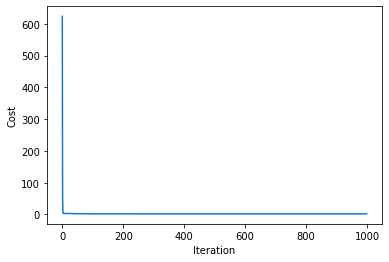

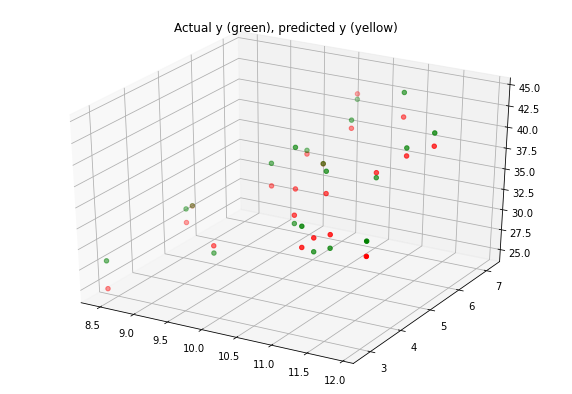

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate a sample dataset
np.random.seed(0)

# generate nilai x1, x2 --ganti dengan nilai dari dataset
x1 = np.random.normal(10, 1, 100)
print(x1)
x2 = np.random.normal(5, 1, 100)
print(x2)

#generate nilai y dengan nikai y = 2x1 + 3x2 + random number 0 ...2 
y = 2 * x1 + 3 * x2 + np.random.normal(0, 2, 100)

# Convert data to a dataframe
df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})
print(df)

# Split data into training and testing sets
training_df = df.iloc[:(round(0.8*len(x1))), :]
testing_df = df.iloc[(round(0.8*len(x1))):, :]

# Calculate coefficients using gradient descent

# siapkan data training dengan 2 variabel x1 dan x2 dan 1 target (y)
X_train = training_df[['x1', 'x2']] #feature
y_train = training_df['y']          #target

# tambahkan satu kolom bernilai 1 pada data X_training supaya baris dan kolom antara X dan y sama, sehingga bisa dikalikan
X_train = np.c_[np.ones(len(X_train)), X_train]

# beri nilai awal theta yaitu 0
# membuat 1 baris matrix berisi angka 0 sejumlah data X_train
theta = np.zeros(X_train.shape[1])
print(theta)


# tentukan alpha (learning rate)
alpha = 0.01

# tentukan banyak data training, disimpan di m, banyak iterasi (num_iters)
m = len(y_train)
num_iters = 1000

# buat array untuk menyimpan perubahan nilai cost overtime
J_history = []

# hitung theta sebanyak num_iters kali
for i in range(num_iters):

    # menacari data prediksi dengan rumus regresi
    y_pred = X_train @ theta

    # mencari error dari selisih data prediksi dengan data asli
    error = y_pred - y_train
    # print (error)

    # rumus cost function
    # 1/2m dikali jumlah error kuadrat
    cost = 1/(2*m) * np.sum(error**2)
    J_history.append(cost)

    # rumus gradient descent utk multivariate menggunakan numpy
    # gradient = 1/m * transpose dari data training dikalikan matrix error
    # transpose matrix kolom dijadikan baris, baris dijadikan kolom
    '''Transposing the data training matrix in multivariate regression is necessary because 
    it allows us to calculate the gradient of the cost function with respect to the model parameters, 
    which is used to update the parameters during each iteration of gradient descent. 
    Specifically, transposing the matrix allows us to perform matrix multiplication 
    between the feature matrix and the error vector, resulting in a vector that represents the gradient of the cost function 
    with respect to each parameter. This vector is then used to update the 
    parameters in the direction of steepest descent, minimizing the cost function and improving the accuracy of the model.
    To calculate the gradient of the cost function with respect to the model parameters, we need to multiply the error 
    with the feature matrix. 
    This multiplication requires that the feature matrix is transposed.
    In other words, transposing the feature matrix allows us to obtain a vector of 
    partial derivatives with respect to each model parameter, which is used to update the model parameters 
    during gradient descent. Without transposing the feature matrix, 
    we would not be able to perform this calculation correctly.
    '''
    
    gradient = 1/m * X_train.T @ error

    # update theta terbaru
    theta = theta - alpha * gradient

# Use the coefficients to make predictions on the test set
# rumus regresi multivariate adalah perkalian matriks X_test dengan matriks berisi theta/koefisien regresi
X_test = testing_df[['x1', 'x2']]

# supaya matriks bisa dikalikan, jumlah kolom X dengan jumlah baris Y harus sama. Sehingga ditambah 1 kolom bernilai angka 1 di matriks y.
X_test = np.c_[np.ones(len(X_test)), X_test]
y_pred = X_test @ theta
y_test = testing_df['y']

# Calculate mean squared error as a metric
mse = np.mean((y_test - y_pred)**2)
print("Mean Squared Error: ", mse)

# Plot the cost function over the number of iterations
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(testing_df['x1'], testing_df['x2'], y_test, color = "green")
ax.scatter3D(testing_df['x1'], testing_df['x2'], y_pred, color = "red")
plt.title("Actual y (green), predicted y (yellow)")
 
# show plot
plt.show()


In [3]:
print(X_train)
print(X_train.T)

[[ 1.         11.76405235  6.8831507 ]
 [ 1.         10.40015721  3.65224094]
 [ 1.         10.97873798  3.729515  ]
 [ 1.         12.2408932   5.96939671]
 [ 1.         11.86755799  3.82687659]
 [ 1.          9.02272212  6.94362119]
 [ 1.         10.95008842  4.58638102]
 [ 1.          9.84864279  4.25254519]
 [ 1.          9.89678115  6.92294203]
 [ 1.         10.4105985   6.48051479]
 [ 1.         10.14404357  6.86755896]
 [ 1.         11.45427351  5.90604466]
 [ 1.         10.76103773  4.13877431]
 [ 1.         10.12167502  6.91006495]
 [ 1.         10.44386323  4.73199663]
 [ 1.         10.33367433  5.8024564 ]
 [ 1.         11.49407907  5.94725197]
 [ 1.          9.79484174  4.84498991]
 [ 1.         10.3130677   5.61407937]
 [ 1.          9.14590426  5.92220667]
 [ 1.          7.44701018  5.37642553]
 [ 1.         10.6536186   3.90059921]
 [ 1.         10.8644362   5.29823817]
 [ 1.          9.25783498  6.3263859 ]
 [ 1.         12.26975462  4.30543214]
 [ 1.          8.54563433